Calculate Kuiper metric for a given cadence for each point of the sky.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils
from rubin_sim.data import get_baseline

from simcodes.fitters import ExtendedLS
from gatspy.periodic import LombScargleMultiband
from KuiperMetric import KuiperVS

In [2]:
# Grab the current baseline file. Should have been downloaded with rubin_sim. 
# Can grab lots of different sims from: http://astro-lsst-01.astro.washington.edu:8081/
baseline_file = get_baseline()
name = os.path.basename(baseline_file).replace('.db','')
conn = maf.db.OpsimDatabase(baseline_file)
outDir = 'temp'
resultsDb = maf.db.ResultsDb(outDir=outDir)

In [3]:
# Same for rolling cadence
rollDbFile = '/mnt/Data/Work/Sources/rubin_sim_data/experiments/rolling_all_sky_ns2_rw0.9_v2.0_10yrs.db'
rollName = os.path.split(rollDbFile)[-1].replace('.db', '')
rollDb = maf.db.OpsimDatabase(rollDbFile)
resultsDbRoll = maf.db.ResultsDb(outDir=outDir)
print(rollName)

rolling_all_sky_ns2_rw0.9_v2.0_10yrs


In [4]:
# Set range of periods for which we're gonna build the maps
perStep=0.1
numPoints=10
periods=np.round(np.linspace(perStep, numPoints*perStep,numPoints,dtype='float'),3)
bundleList=[]
bundleListRoll=[]
nside=2**5 # for HealpixSlicer
for p in periods:
    metric = KuiperVS(period=p)
    sql = ''
    slicer = maf.HealpixSlicer(nside=nside)
    bundleList.append(maf.MetricBundle(metric, slicer, sql, runName='KuiperVSTest_'+str(p)))
    bundleListRoll.append(maf.MetricBundle(metric, slicer, sql, runName='RollKuiperVSTest_'+str(p)))

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


In [5]:
bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
bg = maf.metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Querying database observations with no constraint for columns ['observationStartMJD', 'rotSkyPos', 'fieldRA', 'fieldDec'].
Found 2086980 visits
Running:  ['KuiperVSTest_0_1_KuiperVS_observationStartMJD_HEAL', 'KuiperVSTest_0_2_KuiperVS_observationStartMJD_HEAL', 'KuiperVSTest_0_3_KuiperVS_observationStartMJD_HEAL', 'KuiperVSTest_0_4_KuiperVS_observationStartMJD_HEAL', 'KuiperVSTest_0_5_KuiperVS_observationStartMJD_HEAL', 'KuiperVSTest_0_6_KuiperVS_observationStartMJD_HEAL', 'KuiperVSTest_0_7_KuiperVS_observationStartMJD_HEAL', 'KuiperVSTest_0_8_KuiperVS_observationStartMJD_HEAL', 'KuiperVSTest_0_9_KuiperVS_observationStartMJD_HEAL', 'KuiperVSTest_1_0_KuiperVS_observationStartMJD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [6]:
bdRoll = maf.metricBundles.makeBundlesDictFromList(bundleListRoll)
bgRoll = maf.metricBundles.MetricBundleGroup(bdRoll, rollDb, outDir=outDir, resultsDb=resultsDbRoll)
bgRoll.runAll()

Querying database observations with no constraint for columns ['observationStartMJD', 'rotSkyPos', 'fieldRA', 'fieldDec'].
Found 2088105 visits
Running:  ['RollKuiperVSTest_0_1_KuiperVS_observationStartMJD_HEAL', 'RollKuiperVSTest_0_2_KuiperVS_observationStartMJD_HEAL', 'RollKuiperVSTest_0_3_KuiperVS_observationStartMJD_HEAL', 'RollKuiperVSTest_0_4_KuiperVS_observationStartMJD_HEAL', 'RollKuiperVSTest_0_5_KuiperVS_observationStartMJD_HEAL', 'RollKuiperVSTest_0_6_KuiperVS_observationStartMJD_HEAL', 'RollKuiperVSTest_0_7_KuiperVS_observationStartMJD_HEAL', 'RollKuiperVSTest_0_8_KuiperVS_observationStartMJD_HEAL', 'RollKuiperVSTest_0_9_KuiperVS_observationStartMJD_HEAL', 'RollKuiperVSTest_1_0_KuiperVS_observationStartMJD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


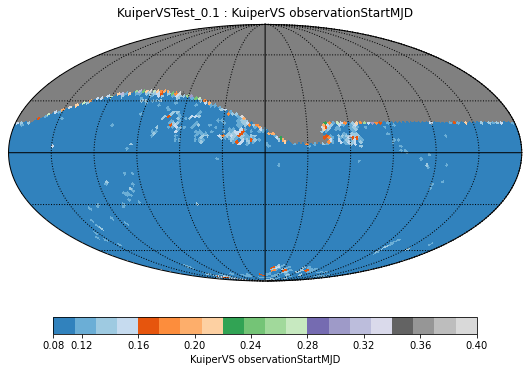

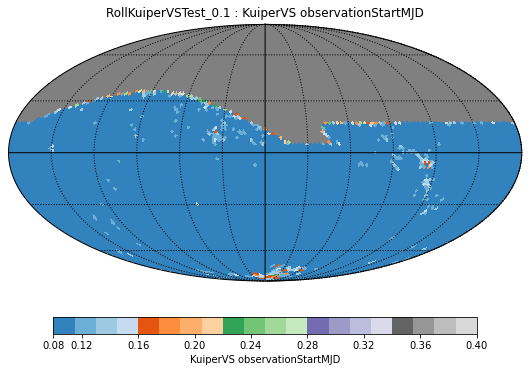

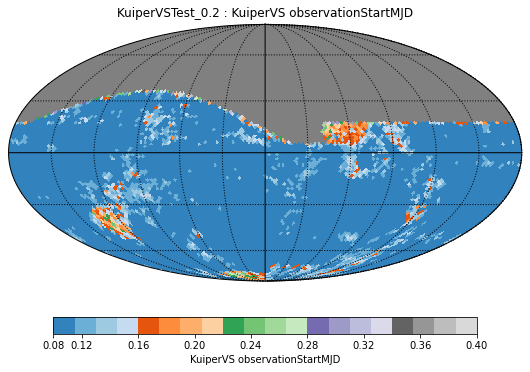

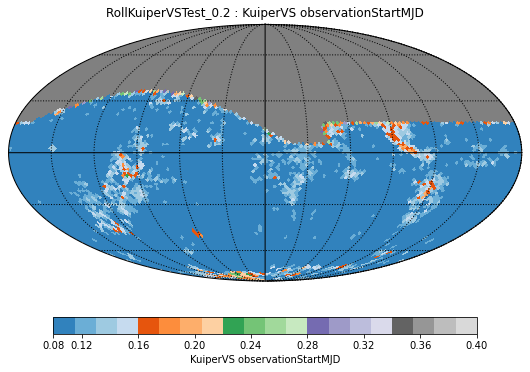

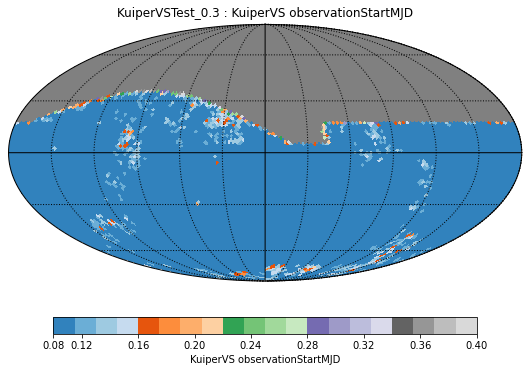

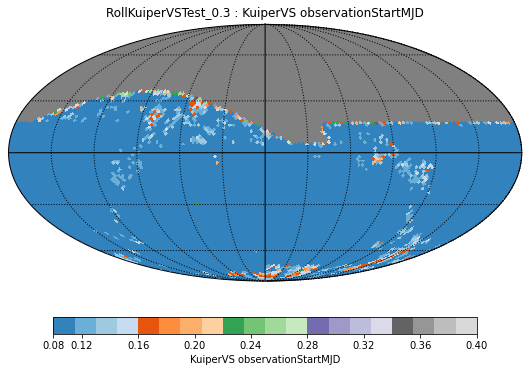

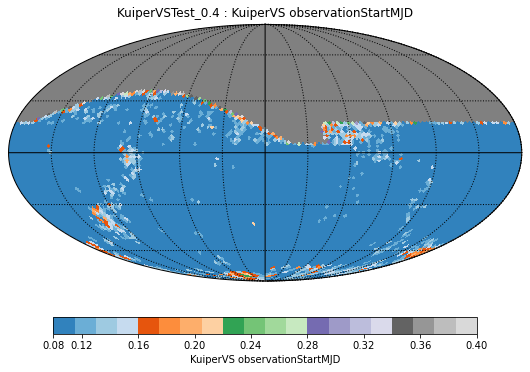

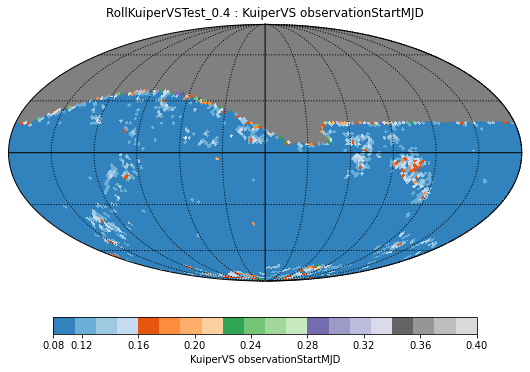

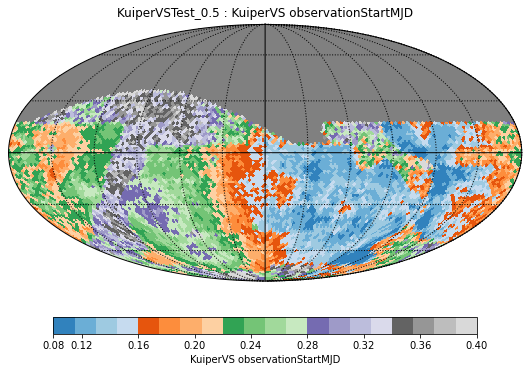

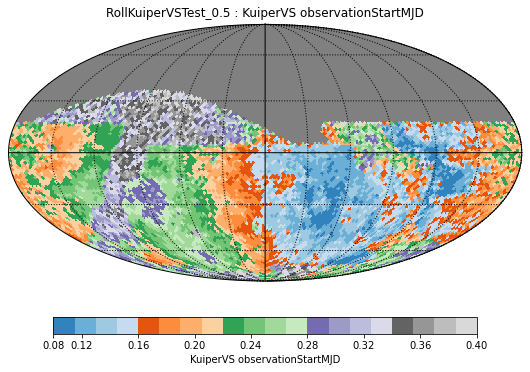

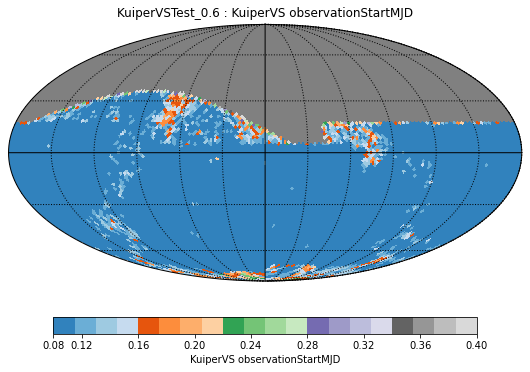

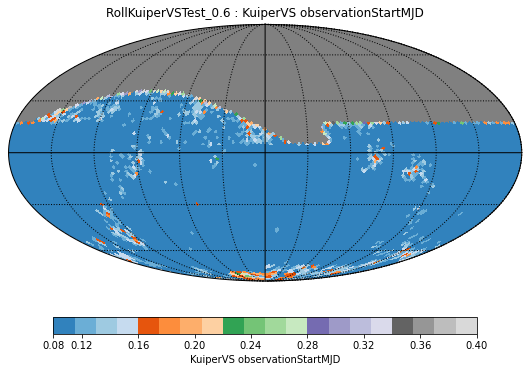

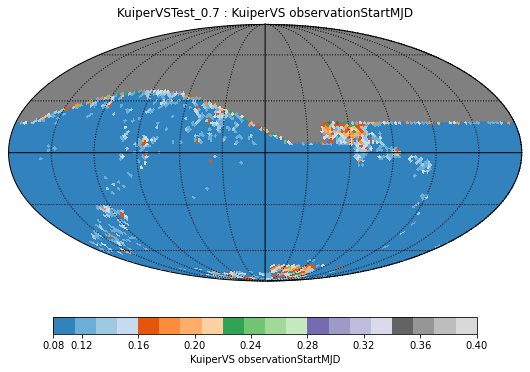

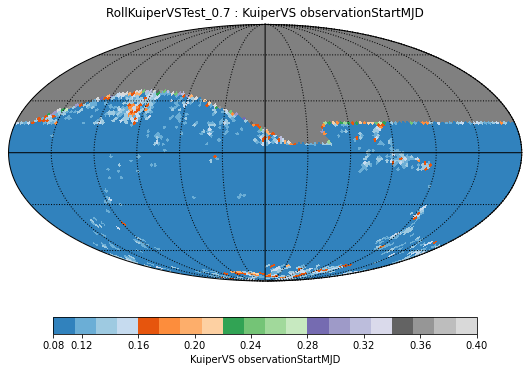

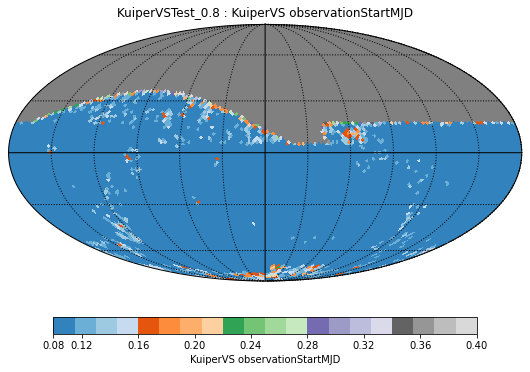

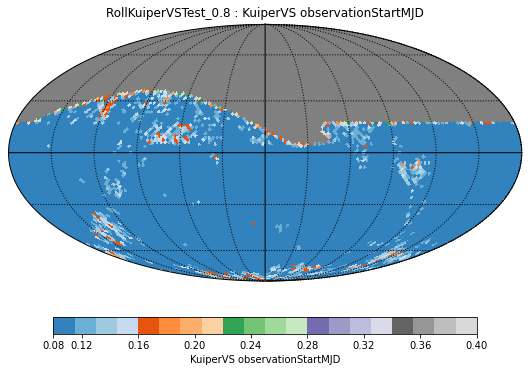

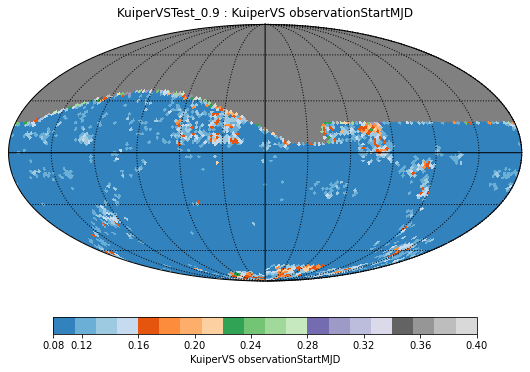

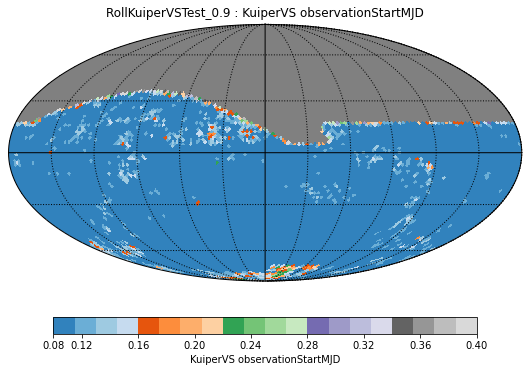

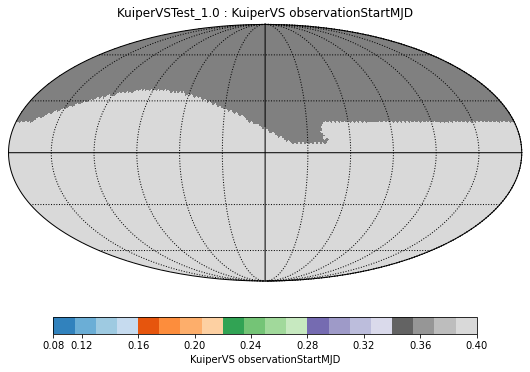

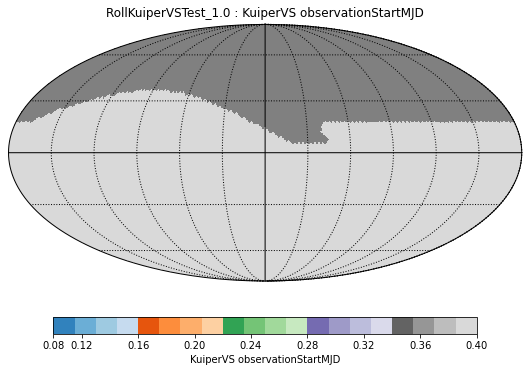

In [7]:
plotDict={"colorMin": 0.1,"colorMax": 0.4,"cmap": plt.get_cmap("tab20c"),"figsize": (8, 5)}
# Let's plot Kuiper metric maps for the base and rolling cadence. To do: make this plot multi-column to be able
# to visually compare different cadences
for m in bg.bundleDict:
    metr=bg.bundleDict[m]
    metr.setPlotDict(plotDict)
    metr.setPlotFuncs([maf.HealpixSkyMap()])
    metr.plot()
    
    metr=bgRoll.bundleDict['Roll'+m]
    metr.setPlotDict(plotDict)
    metr.setPlotFuncs([maf.HealpixSkyMap()])
    metr.plot()

In [8]:
def phasedCadence(period:float,dataSlice,mjdCol:str='observationStartMJD'):
    """
    Returns phase values for the timestamps of observatons
    """
    return (dataSlice[mjdCol]%float(period)/float(period))

In [9]:
def getHpidByCondition(values:np.ndarray,hpids:np.ndarray,
                      valMin:float=0.001, valMax:float=0.99, 
                      randSampleSize:int=None)->pd.DataFrame:
    """
    This function returns a dataFrame with two columns: 'hpid' for hpix id and 'kuipValue' for their 
    Kuiper metric values. Only those hpix which correspond to a condition are taken; the condition can be
    that the Kuiper values were in a range between valMin and valMax, or we can take a random sample of
    an arbitrary choice from this selection.
    """
    df=pd.DataFrame(columns=['hpid','kuipValue'])
    selectArr=np.full_like(values,False,dtype=bool)
    selectArr[np.where((values >= valMin) & (values<=valMax))]=True
    df['hpid']=hpids[selectArr]
    df['kuipValue']=values[np.where((values >= valMin) & (values<=valMax))]
    if randSampleSize!=None:
        df=df.sample(randSampleSize)
    return df

In [10]:
# Take one of the maps and get three lists of hpix: with low, high and random Kuiper metric values.
# We can use these lists to analyze how different Kuiper metric values affect the quality of determination
# of periods

workBundle=bundleList[4]
values=workBundle.metricValues.data
hpids=workBundle.slicer.slicePoints['sid']
period=workBundle.runName.split('_')[1]

kuipHpidLists={'kuipHigh':getHpidByCondition(values,hpids,valMin=0.4, valMax=0.8),
              'kuipLow':getHpidByCondition(values,hpids,valMin=0.08, valMax=0.12),
              'kuipRand':getHpidByCondition(values,hpids,randSampleSize=100)}

In [11]:
print('Low Kuip len',len(kuipHpidLists['kuipLow']))
print('High Kuip len',len(kuipHpidLists['kuipHigh']))
print('Rand Kuip len',len(kuipHpidLists['kuipRand']))

Low Kuip len 560
High Kuip len 48
Rand Kuip len 100


In [12]:
"""
For some weird reason just passing a hpidList results in a lesser number of hpid-associated dataSlices 
than the length of the hpidList (too many hpids return masked, as if there are no observations - which is 
not true). Because of this this cell is temporarily commented, and instead of it the code in 
the next cell is used.
"""
"""
metricPass = maf.metrics.PassMetric(cols=['filter', 'observationStartMJD', 'fiveSigmaDepth'])
sql = ''
bundleListKuip=[]
for key,val in kuipHpidLists.items():
    slicerKuip=maf.HealpixSubsetSlicer(nside=nside,hpid=val['hpid'])
    bundleListKuip.append(maf.MetricBundle(metricPass, slicerKuip, sql, runName=key))

bdKuip = maf.metricBundles.makeBundlesDictFromList(bundleListKuip)
bgKuip = maf.metricBundles.MetricBundleGroup(bdKuip, conn, 
                                                outDir=outDir, resultsDb=resultsDb)
bgKuip.runAll()
"""

"\nmetricPass = maf.metrics.PassMetric(cols=['filter', 'observationStartMJD', 'fiveSigmaDepth'])\nsql = ''\nbundleListKuip=[]\nfor key,val in kuipHpidLists.items():\n    slicerKuip=maf.HealpixSubsetSlicer(nside=nside,hpid=val['hpid'])\n    bundleListKuip.append(maf.MetricBundle(metricPass, slicerKuip, sql, runName=key))\n\nbdKuip = maf.metricBundles.makeBundlesDictFromList(bundleListKuip)\nbgKuip = maf.metricBundles.MetricBundleGroup(bdKuip, conn, \n                                                outDir=outDir, resultsDb=resultsDb)\nbgKuip.runAll()\n"

In [13]:
# Obtain observational data for each hpix separately. To do: fix the previous cell, because 
# doing it for each healPix in a cycle is computationally terrible

metricPass = maf.metrics.PassMetric(cols=['filter', 'observationStartMJD', 'fiveSigmaDepth'])
sql = ''
bundleListKuipByHPix=[]
for hpid in kuipHpidLists['kuipHigh']['hpid']:
    slicerKuip=maf.HealpixSubsetSlicer(nside=nside,hpid=[hpid])
    bundleListKuipByHPix.append(maf.MetricBundle(metricPass, slicerKuip, sql, runName=str(hpid)))

bdKuipByHPix = maf.metricBundles.makeBundlesDictFromList(bundleListKuipByHPix)
bgKuipByHPix = maf.metricBundles.MetricBundleGroup(bdKuipByHPix, conn, 
                                                outDir=outDir, resultsDb=resultsDb)
bgKuipByHPix.runAll()

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slic

Completed metric generation.
Running:  ['12208_Pass_filter_observationStartMJD_fiveSigmaDepth_HEAL']
Completed metric generation.
Running:  ['12209_Pass_filter_observationStartMJD_fiveSigmaDepth_HEAL']
Completed metric generation.
Running:  ['12230_Pass_filter_observationStartMJD_fiveSigmaDepth_HEAL']
Completed metric generation.
Running:  ['12250_Pass_filter_observationStartMJD_fiveSigmaDepth_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, cas

/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, cas

/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, cas

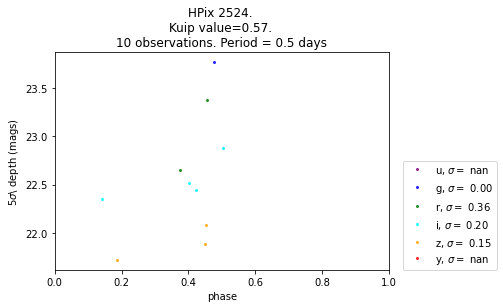

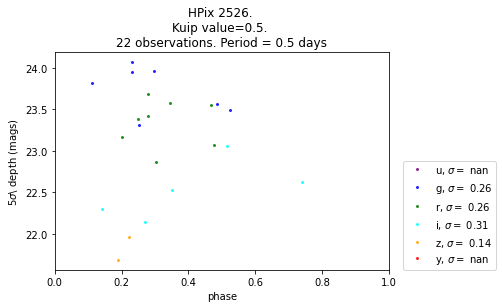

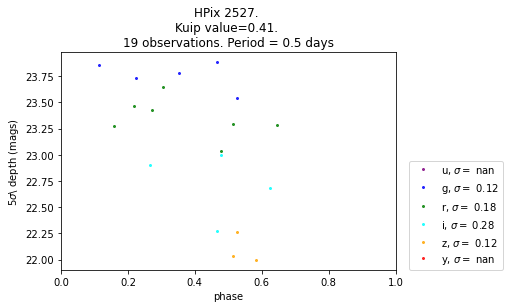

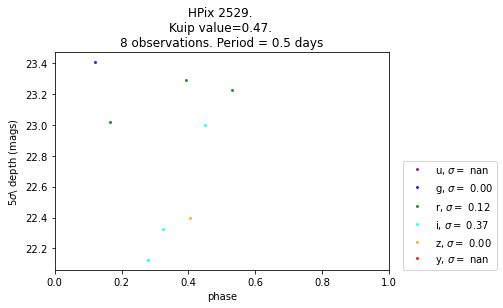

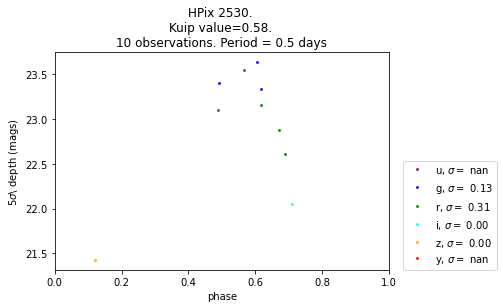

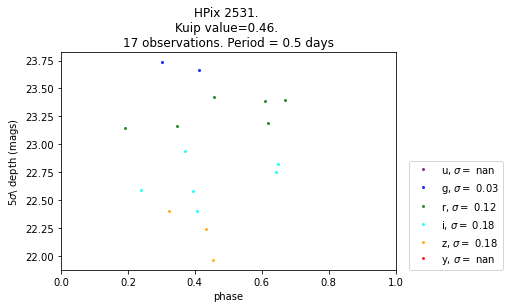

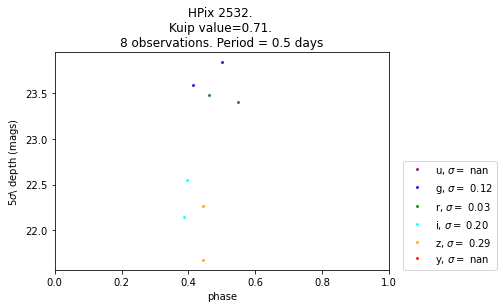

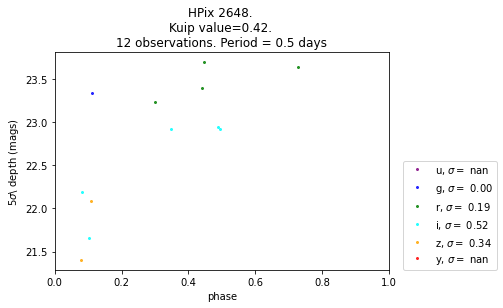

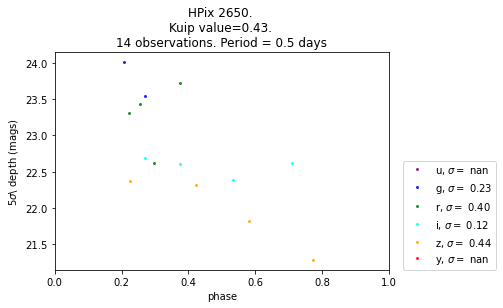

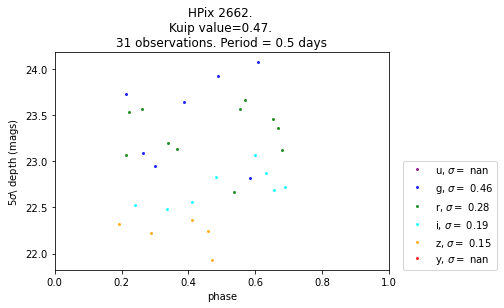

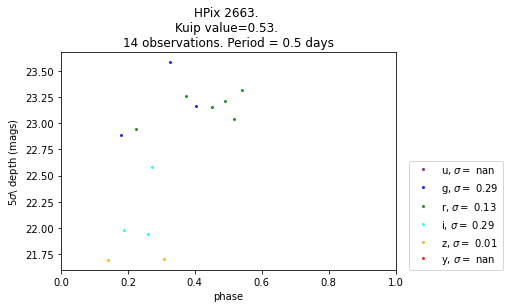

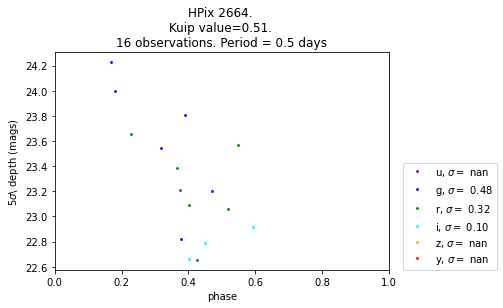

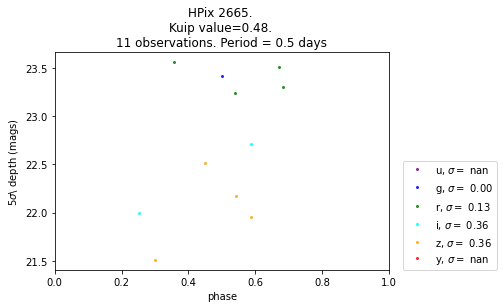

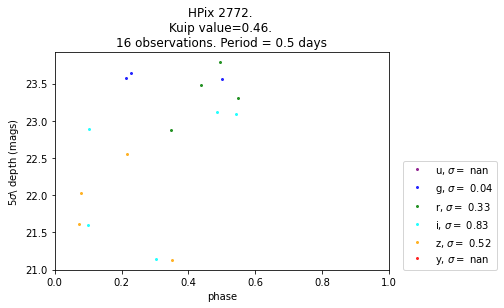

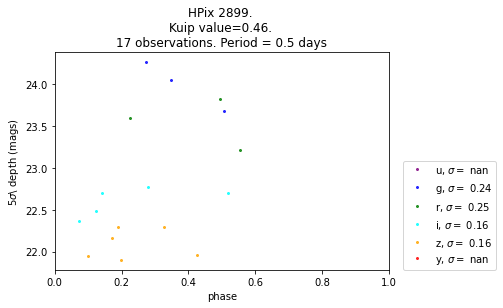

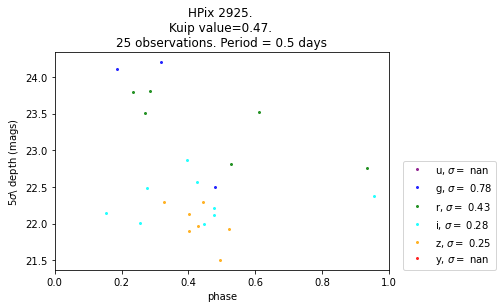

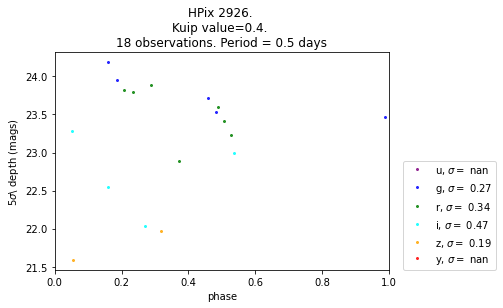

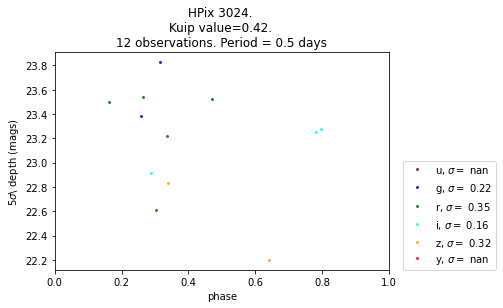

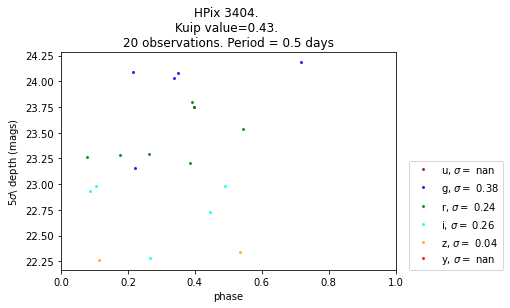

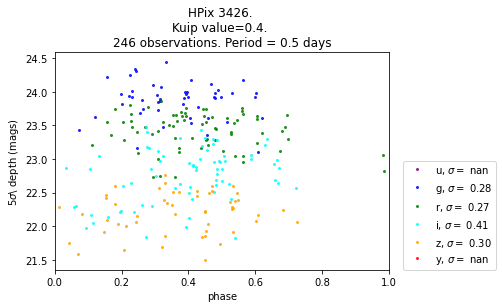

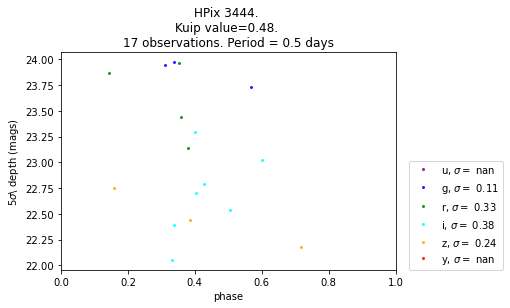

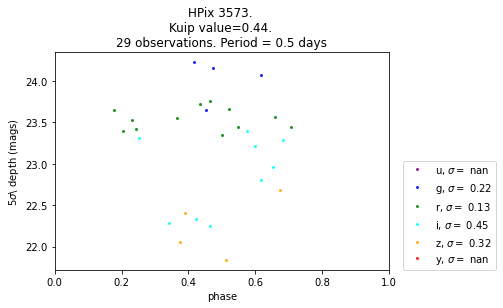

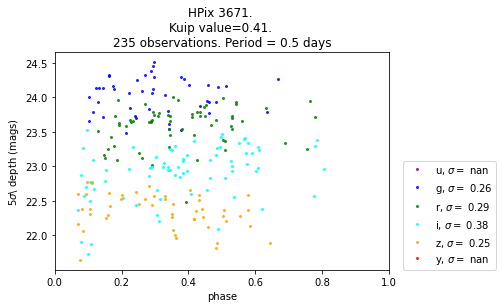

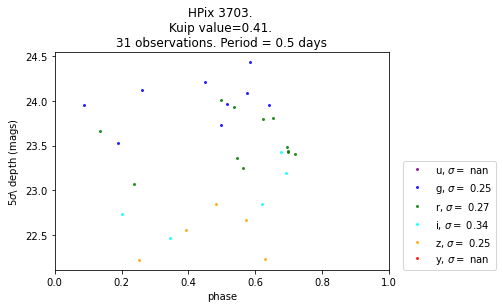

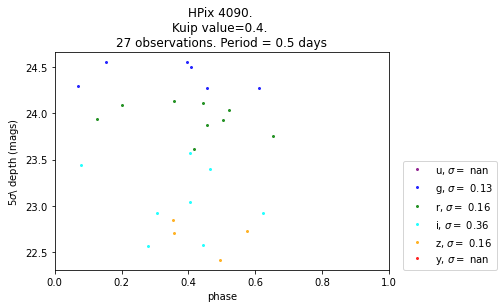

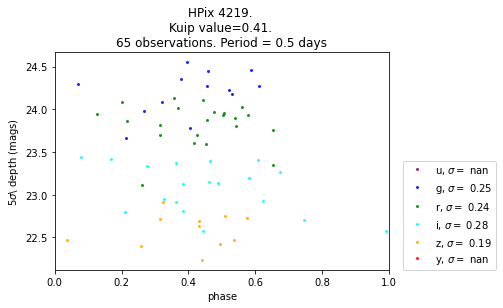

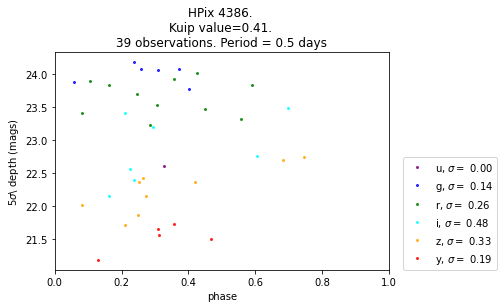

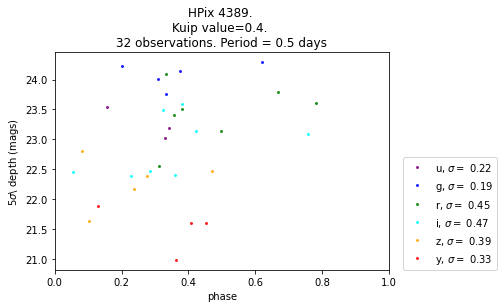

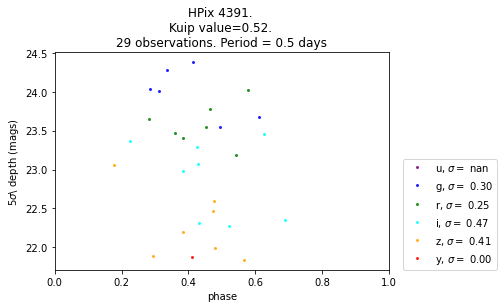

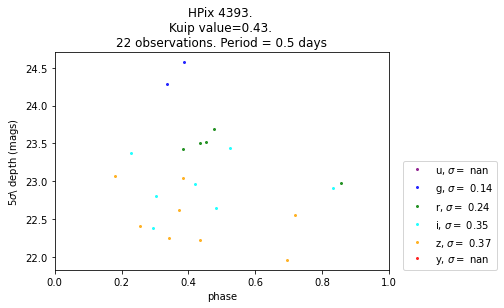

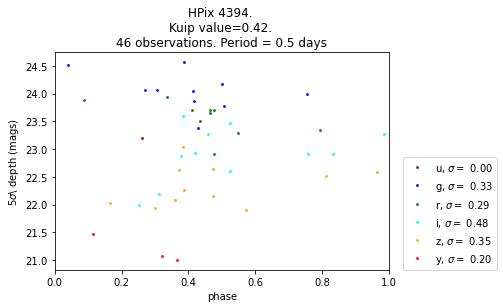

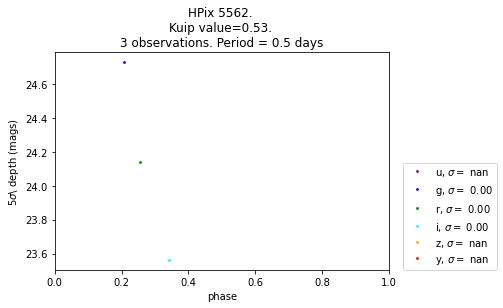

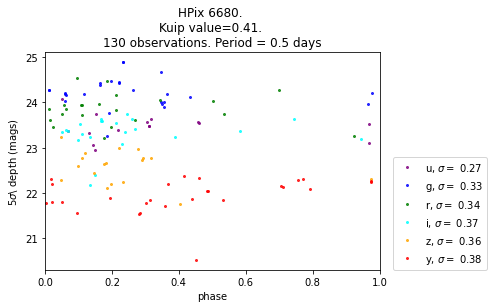

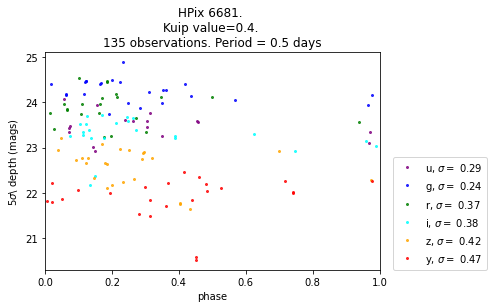

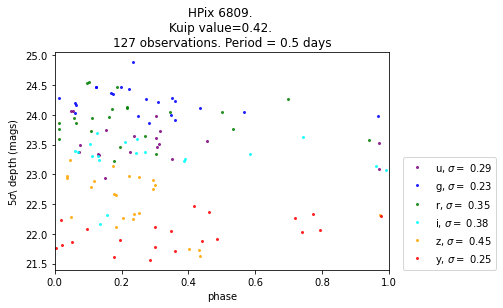

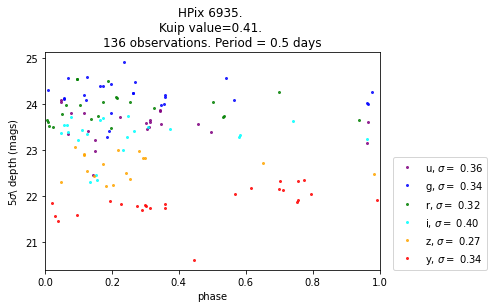

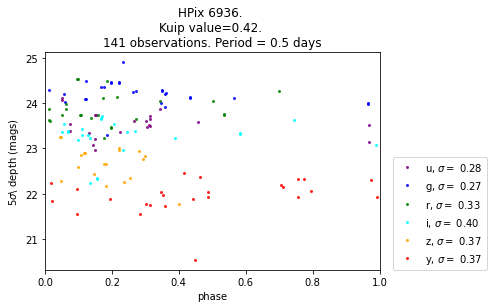

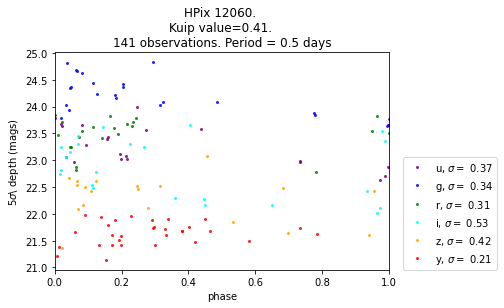

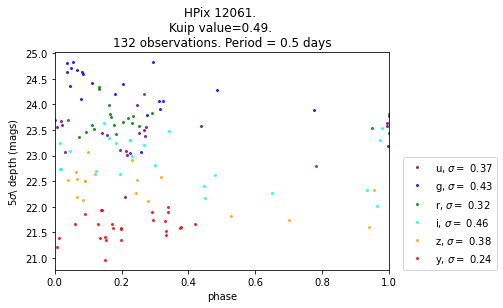

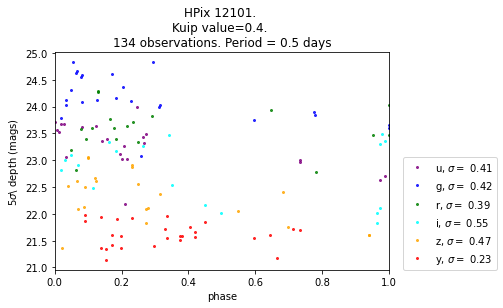

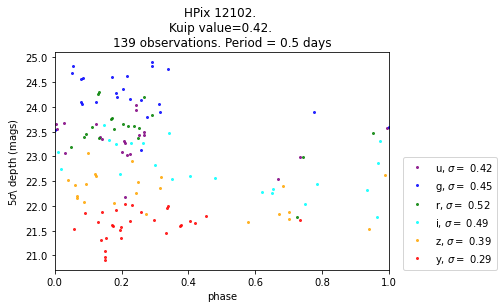

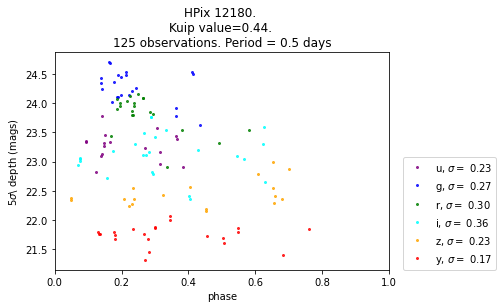

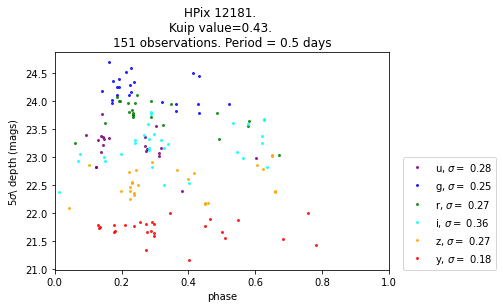

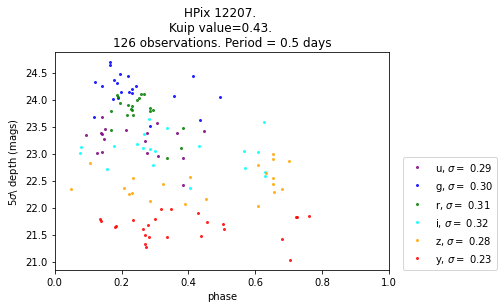

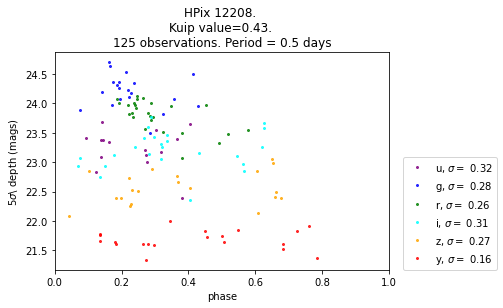

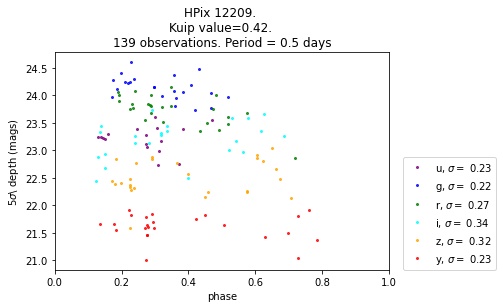

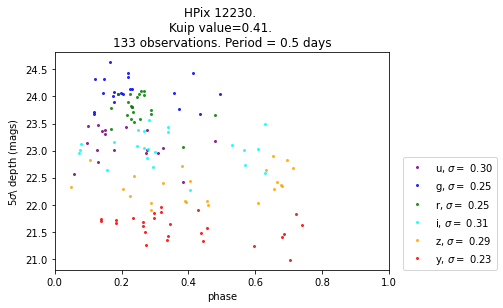

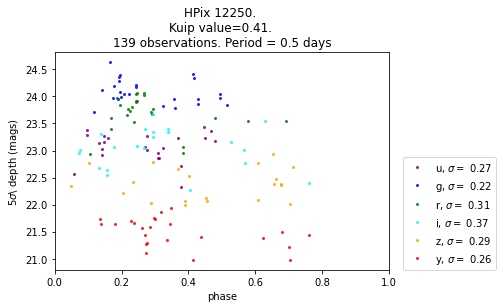

In [15]:
# Plot phased observations for every healpix

for i in range(len(bundleListKuipByHPix)):
    dataSlice=bundleListKuipByHPix[i].metricValues.data[~bundleListKuipByHPix[i].metricValues.mask][0]
    new_dt = np.dtype(dataSlice.dtype.descr + [('phasedObs', '<f8')])
    dataSlice2 = np.zeros(dataSlice.shape, dtype=new_dt)
    for c in dataSlice.dtype.names:
        dataSlice2[c]=dataSlice[c]
    dataSlice2['phasedObs']=phasedCadence(period=period,dataSlice=dataSlice)
    # Let's plot up what the 5-sigma depth looks like
    plt.figure()
    # Give each filter it's own color
    f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
           'i': 'cyan', 'z': 'orange', 'y': 'red'}
    for fn in f2c:
        in_filt = np.where(dataSlice2['filter'] == fn)[0]
        plt.plot(dataSlice2['phasedObs'][in_filt],
                 dataSlice2['fiveSigmaDepth'][in_filt], 'o',
                 color=f2c[fn],
                 label=fn+r', $\sigma=$ %.2f' % (np.std(dataSlice2['fiveSigmaDepth'][in_filt])),
                 alpha=0.8,
                 markersize=2)
    plt.xlabel('phase')
    plt.ylabel(r'5$\sigma$\ depth (mags)')
    plt.xlim(0,1)
    plt.legend(loc=(1.04,0))
    kuipVal=round(kuipHpidLists['kuipHigh'][kuipHpidLists['kuipHigh']['hpid']==int(bundleListKuipByHPix[i].runName)]['kuipValue'].iloc[0],2)
    plt.title('HPix '+bundleListKuipByHPix[i].runName+'. \n'+
              'Kuip value='+str(kuipVal)+'. \n'+
              str(len(dataSlice))+' observations. Period = '+period+' days')

In [16]:
### Integrating with period determination
library=pd.read_csv('/mnt/Data/Work/GitHub/KuiperTest_VStemplates/simcodes/ZTF_VS_all_formatted.csv',index_col=0)
library['unique_filts_']=library['unique_filts_'].apply(lambda x:list(map(eval,x[1:-1].split(' '))))
library['ymean_by_filt_']=library['ymean_by_filt_'].apply(lambda x:np.array([float(k) for k in x[1:-1].split(' ') if len(k)>0]))
library['theta']=library['theta'].apply(lambda x:np.array([float(k) for k in x[1:-1].split(' ') if len(k)>0]))

In [28]:
def determinePeriod(dataSlice,row,periodMin:float, periodMax:float,plot:bool)->float:
    """
    Determine period for a simulated light curve 'observed' with a given cadence. Credits for the simcode and 
    LCs to Kresimir Tisanic
    """
    uniqueFilts=[s.strip('z') for s in row['unique_filts_']]
    dataSlice=dataSlice[np.isin(dataSlice['filter'], uniqueFilts)]
    t=dataSlice['observationStartMJD']
    filts=dataSlice['filter']
    ext=ExtendedLS(fit_period=True,optimizer_kwds=dict(quiet=True),Nterms_base=row['Nterms'])
    ext.import_parameters(row)
    mags = ext.predict(t=t,filts=filts)
    magErrs=0.1*mags
    ext.optimizer.period_range = (periodMin, periodMax)
    p=ext.fit(t,mags,magErrs,filts).best_period
    if plot==True:
        fig=plt.figure(figsize=(5,5))
        subplot=fig.add_subplot(1,1,1)
        for f in uniqueFilts:
            subplot.scatter((t[np.where(filts==f)]%p)/p,mags[np.where(filts==f)],s=1,label=f)
        subplot.legend()
    return p

In [31]:
def getLCsFromHPix(bundleListByHPix:list,idx:int,
                   library:pd.DataFrame,periodMin=0.001,periodMax=10,
                   plot:bool=True):
    """
    Return the LC library table with best determined periods and their differences with the model ones
    """
    dataSlice=bundleListByHPix[idx].metricValues.data[~bundleListByHPix[idx].metricValues.mask][0]
    print('dataSlice size is '+str(len(dataSlice)))
    libraryObsQuality=library.copy(deep=True)
    libraryObsQuality['detectedPeriod']=None
    fig=plt.figure(figsize=(3,2))


    libraryObsQuality['detectedPeriod']=libraryObsQuality.progress_apply(lambda row:determinePeriod(dataSlice,row,
                                                                                           periodMin, periodMax,
                                                                                           plot=plot), 
                                                                                           axis=1)
    libraryObsQuality['diffPeriod']=libraryObsQuality['_best_period']-libraryObsQuality['detectedPeriod']
    libraryObsQuality['relativeError']=libraryObsQuality['diffPeriod']*100/libraryObsQuality['_best_period']
    return libraryObsQuality

In [18]:
kuipHpidLists['kuipRand'][kuipHpidLists['kuipRand']['kuipValue']>0.3]

,hpid,kuipValue
174,3302,0.338808
471,4088,0.343041
1468,5337,0.325855
781,4575,0.343775
1,2524,0.571711
1473,5342,0.320769
6812,10701,0.342619
2868,6757,0.346422
3764,7653,0.332899
6456,10345,0.366858


In [19]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [20]:
# An ugly hack to get an internal id of an hpix by its global map hpid. To do: make it less ugly
idxs={l.runName:i for i,l in enumerate(bundleListKuipByHPix)}

In [41]:
d=kuipHpidLists['kuipHigh']
d[d['hpid']==12102]

,hpid,kuipValue
40,12102,0.422075


In [21]:
idxs['12102']

40

In [38]:
# See LCs with periods in a range that we investigate right now (meaning: the range close to the period
# used for calculating the Kuiper value)
library[(library['_best_period']>0.48) & (library['_best_period']<0.51)]

,_best_period,unique_filts_,ymean_by_filt_,omega,theta,source_id,Expected,E-C,Type,Subtype,Nterms,detectedPeriod
52,0.503685,[zr],[16.44935035],12.474437,"[0.165414422, -0.208396413, -0.00837025178, 4....",4072920858405481600,0.601972,0.098287,RR,fundamental mode,1,None
153,0.484194,"[zg, zr]","[18.86312737, 17.51511101]",12.976576,"[0.18104185, -0.23652352, 0.38562217, -0.05016...",4116498318147631232,0.484063,-0.000132,RR,fundamental mode,1,None
169,0.506052,"[zg, zr]","[18.5426503, 17.65873161]",12.416078,"[0.11387188, -0.16286197, -0.41692642, 0.14988...",4116960005660630272,0.506013,-0.000039,RR,fundamental mode,1,None
182,0.499373,"[zg, zi]","[19.44978421, 18.6683998]",12.582153,"[-0.14081325, -0.21003245, 0.05783711, 0.01183...",899283417829343744,0.584581,0.085208,RR,fundamental mode,1,None
184,0.507698,"[zg, zr]","[16.96715793, 16.43185216]",12.375823,"[0.05572377, 0.27347325, 0.28841492, 0.0818993...",4089378279751765120,0.446090,-0.061608,RR,fundamental mode,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...
100186,0.490399,"[zg, zi, zr]","[17.16617467, 16.70437024, 16.72978159]",12.812403,"[0.09674357, 0.34216595, -0.11003756, -0.02856...",4587477800342119936,0.490419,0.000020,RR,fundamental mode,5,None
100195,0.488861,"[zg, zi, zr]","[15.52408957, 15.34782036, 15.36170137]",12.852709,"[0.04272845, 0.06930996, 0.36468655, 0.06861, ...",2094733688604844160,0.488859,-0.000002,RR,fundamental mode,5,None
100215,0.504569,"[zg, zi, zr]","[17.78120344, 17.64699824, 17.66612978]",12.452581,"[0.1289967, -0.28893133, -0.21536774, -0.14693...",2150995797377659520,0.504573,0.000004,RR,fundamental mode,5,None
100245,0.502045,"[zg, zi, zr]","[17.29055838, 17.18311403, 17.2625457]",12.515177,"[0.10941777, -0.34293055, 0.14051259, -0.01039...",1330949101617006208,0.502056,0.000011,RR,fundamental mode,5,None


dataSlice size is 139


  0%|          | 0/3 [00:00<?, ?it/s]

,_best_period,unique_filts_,ymean_by_filt_,omega,theta,source_id,Expected,E-C,Type,Subtype,Nterms,detectedPeriod,diffPeriod,relativeError
66830,0.300477,"[zg, zi, zr]","[17.93485495, 18.029099, 17.91590579]",20.910694,"[0.03217458, -0.02050232, -0.22016727, 0.05825...",1330968484805660800,0.300477,-2.202420e-07,RR,first-overtone,3,0.300477,2.077804e-08,0.000007
66831,0.513792,"[zg, zi, zr]","[15.77307136, 15.66097248, 15.68973543]",12.229043,"[0.03272435, -0.05519261, 0.36533793, 0.165579...",1339570548385963264,0.513797,5.339388e-06,RR,fundamental mode,3,0.513792,6.009662e-08,0.000012
66832,0.513275,"[zg, zi, zr]","[16.32447846, 16.16658193, 16.21301425]",12.241371,"[0.04096444, 0.19689812, -0.30353544, 0.158969...",1339434896138382592,0.513265,-9.755336e-06,RR,fundamental mode,3,0.513275,-3.934636e-08,-0.000008


<Figure size 216x144 with 0 Axes>

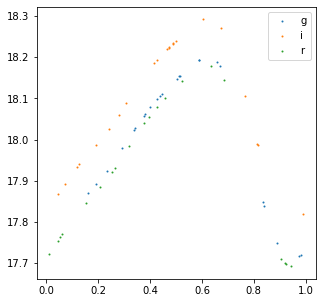

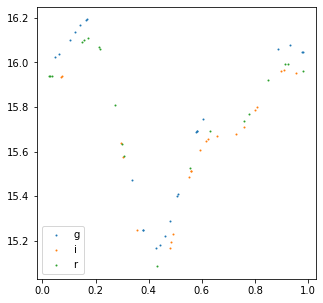

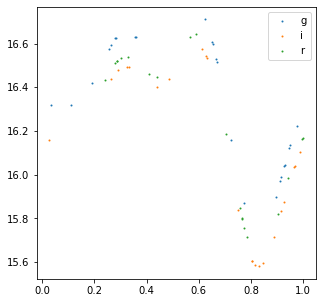

In [32]:
lib=library[66830:66833]
getLCsFromHPix(bundleListKuipByHPix,idx=40,library=lib,periodMin=0.1, periodMax=10)